In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error, mean_absolute_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor

# Data Preprocessing

In [3]:
inputspath_16 = "C:\\Users\\BillWan\\Desktop\\Inner_Wave\\pre-exp\\inputs_win16.csv"
labelspath_16 = "C:\\Users\\BillWan\\Desktop\\Inner_Wave\\pre-exp\\labels_win16.csv"
X_16 = pd.read_csv(inputspath_16)
y_16 = pd.read_csv(labelspath_16)

In [4]:
print(X_16.shape)
print(y_16.shape)

(53440, 16)
(6680, 2)


In [5]:
index = np.arange(53440)
sub_idx1 = index[2::8]
sub_idx2 = index[3::8]
sub_idx3 = index[4::8]
sub_idx4 = index[5::8]
sub_idx5 = index[6::8]
sub_idx6 = index[7::8]

X_16 = X_16.values
X_6v = np.empty([0, 96])

for i in range(sub_idx1.shape[0]):
    X_app = np.concatenate((X_16[sub_idx1[i]], X_16[sub_idx2[i]], X_16[sub_idx3[i]], X_16[sub_idx4[i]], X_16[sub_idx5[i]], X_16[sub_idx6[i]]))
    X_app = np.reshape(X_app,(1,96))
    X_6v = np.append(X_6v, X_app, axis=0)
print(X_6v.shape)

(6680, 96)


In [6]:
print(np.any(np.isnan(X_6v)))

where_are_NaNs = np.isnan(X_6v)
X_6v[where_are_NaNs] = 0

print(np.any(np.isnan(X_6v)))

True
False


In [7]:
y = y_16.iloc[:,1].values
y.shape

(6680,)

# visualisation

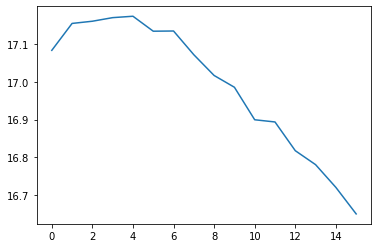

In [8]:
plt.plot(X_16[8*6+2])

In [9]:
y[6]

5

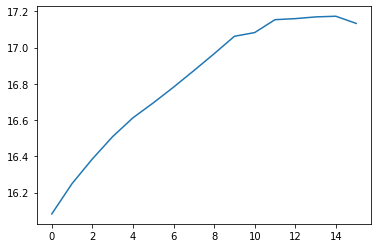

In [10]:
plt.plot(X_16[8*14+2])

In [11]:
y[14]

15

# RandomForestRegressor

In [13]:
ave_score_RF_MSE_final = []
ave_score_RF_MAE_final = []


for i in range(10):

    X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split( X_6v, y, test_size=0.2)

    scaler=StandardScaler()
    X_train_16=scaler.fit_transform(X_train_16)
    X_test_16=scaler.transform(X_test_16)
    
    RF = RandomForestRegressor(n_jobs=-1)

    param_grid = {
          "n_estimators": [250,300,350],
          "min_samples_split": [0, 2, 4, 6],
          "max_depth": [6,8,16]
          }
    RF_grid = RandomizedSearchCV(RF, param_grid, cv=5)
    RF_grid.fit(X_train_16,y_train_16)
    best_est_RF = RF_grid.best_estimator_ 

    best_est_RF.fit(X_train_16,y_train_16)

    y_pred = best_est_RF.predict(X_test_16)
    print('Round {}'.format(i+1))
    print('Best parameters:', RF_grid.best_params_)
    print('MSE: {:.4f}'.format(mean_squared_error(y_test_16, y_pred)))
    print('MAE: {:.4f}'.format(mean_absolute_error(y_test_16, y_pred)))

    print('----------------------------------------------------------------------------------------------------------------------')

    ave_score_RF_MSE_final.append(mean_squared_error(y_test_16, y_pred))
    ave_score_RF_MAE_final.append(mean_absolute_error(y_test_16, y_pred))

Round 1
Best parameters: {'n_estimators': 250, 'min_samples_split': 2, 'max_depth': 16}
MSE: 4.8566
MAE: 0.9956
----------------------------------------------------------------------------------------------------------------------
Round 2
Best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 16}
MSE: 4.1405
MAE: 0.9323
----------------------------------------------------------------------------------------------------------------------
Round 3
Best parameters: {'n_estimators': 350, 'min_samples_split': 2, 'max_depth': 16}
MSE: 4.9058
MAE: 0.9823
----------------------------------------------------------------------------------------------------------------------


KeyboardInterrupt: 

In [ ]:
print("average MSE: {}".format(np.mean(ave_score_RF_MSE_final)))
print("average MAE: {}".format(np.mean(ave_score_RF_MAE_final)))

### n_estimators=300
### max_depth=8
### min_samples_split=2

In [16]:
MSE_RF = []
MAE_RF = []


for i in range(10):

    X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split( X_6v, y, test_size=0.2)

    scaler=StandardScaler()
    X_train_16=scaler.fit_transform(X_train_16)
    X_test_16=scaler.transform(X_test_16)

    RF = RandomForestRegressor(n_jobs=-1,n_estimators=300,max_depth=32,min_samples_split=2)

    RF.fit(X_train_16,y_train_16)

    y_pred = RF.predict(X_test_16)
    print('Round {}'.format(i+1))
    print('MSE: {:.4f}'.format(mean_squared_error(y_test_16, y_pred)))
    print('MAE: {:.4f}'.format(mean_absolute_error(y_test_16, y_pred)))

    print('----------------------------------------------------------------------------------------------------------------------')

    MSE_RF.append(mean_squared_error(y_test_16, y_pred))
    MAE_RF.append(mean_absolute_error(y_test_16, y_pred))

Round 1
MSE: 4.3509
MAE: 0.9565
----------------------------------------------------------------------------------------------------------------------
Round 2
MSE: 3.7494
MAE: 0.9138
----------------------------------------------------------------------------------------------------------------------
Round 3
MSE: 4.3938
MAE: 0.9884
----------------------------------------------------------------------------------------------------------------------
Round 4
MSE: 5.4559
MAE: 1.0479
----------------------------------------------------------------------------------------------------------------------
Round 5
MSE: 4.6418
MAE: 0.9516
----------------------------------------------------------------------------------------------------------------------
Round 6
MSE: 4.6096
MAE: 0.9794
----------------------------------------------------------------------------------------------------------------------
Round 7
MSE: 4.4144
MAE: 0.9409
--------------------------------------------------------------

KeyboardInterrupt: 

In [17]:
print("average MSE: {}".format(np.mean(ave_score_RF_MSE_final)))
print("average MAE: {}".format(np.mean(ave_score_RF_MAE_final)))

average MSE: 4.6343185632276525
average MAE: 0.9700883797409078


## Formal test

In [83]:
X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split( X_6v, y, test_size=0.2)

scaler=StandardScaler()
X_train_16=scaler.fit_transform(X_train_16)
X_test_16=scaler.transform(X_test_16)
 
RF = RandomForestRegressor(n_jobs=-1,n_estimators=350,max_depth=16,min_samples_split=2)

RF.fit(X_train_16,y_train_16)
    

RandomForestRegressor(max_depth=16, n_estimators=350, n_jobs=-1)

In [84]:
print(X_train_16.shape)
print(y_train_16.shape)
print(X_test_16.shape)
print(y_test_16.shape)

(5344, 96)
(5344,)
(1336, 96)
(1336,)


In [85]:
# predict
y_pred_RF = RF.predict(X_test_16)
np.savetxt('y_pred_RF', y_pred_RF, delimiter=',')

In [86]:
print("MSE: ",mean_squared_error(y_test_16, y_pred_RF))
print("MAE: ", mean_absolute_error(y_test_16, y_pred_RF))

MSE:  3.888448275376946
MAE:  0.9275983949452555


In [87]:
# round
y_1_RF = np.around(y_pred_RF)
y_1_RF = y_1_RF.astype(int)
np.savetxt('y_1_RF', y_1_RF, delimiter=',')

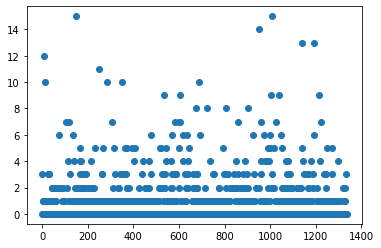

In [88]:
# difference between prediction and label
diff_RF = abs(y_1_RF-y_test_16)
np.savetxt('diff_RF', diff_RF, delimiter=',')
plt.plot(diff_RF, 'o')

In [89]:
# direct accuracy
(len(diff_RF) - np.count_nonzero(diff_RF))/len(diff_RF)

0.6332335329341318

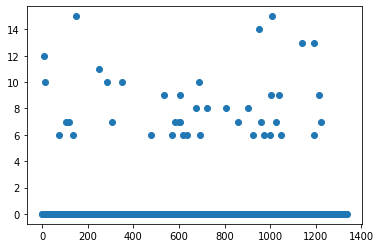

In [90]:
# <=5 then 0
round_diff_RF = np.zeros(len(y_test_16))
for i in range(len(y_test_16)):
    if abs(y_1_RF[i]-y_test_16[i])<=5:
        round_diff_RF[i] = 0
    else:
        round_diff_RF[i] = abs(y_1_RF[i]-y_test_16[i])
# plt.subplot(122)
plt.plot(round_diff_RF, 'o')

In [91]:
# +- 5 pixels are regarded as correctly-classified
1-np.count_nonzero(round_diff_RF)/len(y_test_16)

0.968562874251497

## Formal Test x10

### ±5pixels

In [38]:
RF_Acc = []

for i in range(10):
    X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split( X_6v, y, test_size=0.2)

    scaler=StandardScaler()
    X_train_16=scaler.fit_transform(X_train_16)
    X_test_16=scaler.transform(X_test_16)

    RF = RandomForestRegressor(n_jobs=-1,n_estimators=300,max_depth=32,min_samples_split=2)

    RF.fit(X_train_16,y_train_16)

    # predict
    y_pred_RF = RF.predict(X_test_16)
    print(i, ":")
    print("MSE: ",mean_squared_error(y_test_16, y_pred_RF))
    print("MAE: ", mean_absolute_error(y_test_16, y_pred_RF))

    # round
    y_1_RF = np.around(y_pred_RF)
    y_1_RF = y_1_RF.astype(int)

    # difference between prediction and label
    diff_RF = abs(y_1_RF-y_test_16)

    # <=5 then 0
    round_diff_RF = np.zeros(len(y_test_16))
    for i in range(len(y_test_16)):
        if abs(y_1_RF[i]-y_test_16[i])<=5:
            round_diff_RF[i] = 0
        else:
            round_diff_RF[i] = abs(y_1_RF[i]-y_test_16[i])

    # +- 5 pixels are regarded as correctly-classified
    acc_RF = 1-np.count_nonzero(round_diff_RF)/len(y_test_16)
    print("acc: ", acc_RF)
    # direct accuracy
    print("Direct accuracy: ",(len(diff_RF) - np.count_nonzero(diff_RF))/len(diff_RF))
    print("\n")
    RF_Acc.append(acc_RF)

0 :
MSE:  4.373240851249099
MAE:  0.9273213486447018
acc:  0.968562874251497
Direct accuracy:  0.6212574850299402


1 :
MSE:  4.211610079229845
MAE:  0.9571692974980774
acc:  0.9723053892215568
Direct accuracy:  0.6062874251497006


2 :
MSE:  4.738346581710139
MAE:  0.9516524325433383
acc:  0.9633233532934131
Direct accuracy:  0.6474550898203593


3 :
MSE:  4.0287202371760635
MAE:  0.8963962448479665
acc:  0.9655688622754491
Direct accuracy:  0.6294910179640718


4 :
MSE:  3.813932657476494
MAE:  0.9309221321066382
acc:  0.9730538922155688
Direct accuracy:  0.6100299401197605


5 :
MSE:  4.3995645006509605
MAE:  0.9705521428283402
acc:  0.969311377245509
Direct accuracy:  0.6115269461077845


6 :
MSE:  4.605744529564133
MAE:  0.9958691374466075
acc:  0.9670658682634731
Direct accuracy:  0.5965568862275449


7 :
MSE:  4.79130061976774
MAE:  0.9976692804866457
acc:  0.968562874251497
Direct accuracy:  0.5890718562874252


8 :
MSE:  5.225986913444443
MAE:  1.031370739768382
acc:  0.962574

In [39]:
print(np.mean(RF_Acc))

0.9675898203592814


### ±3pixels

In [45]:
RF_Acc = []

for i in range(10):
    X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split( X_6v, y, test_size=0.2)

    scaler=StandardScaler()
    X_train_16=scaler.fit_transform(X_train_16)
    X_test_16=scaler.transform(X_test_16)

    RF = RandomForestRegressor(n_jobs=-1,n_estimators=300,max_depth=32,min_samples_split=2)

    RF.fit(X_train_16,y_train_16)

    # predict
    y_pred_RF = RF.predict(X_test_16)
    print(i, ":")
    print("MSE: ",mean_squared_error(y_test_16, y_pred_RF))
    print("MAE: ", mean_absolute_error(y_test_16, y_pred_RF))

    # round
    y_1_RF = np.around(y_pred_RF)
    y_1_RF = y_1_RF.astype(int)

    # difference between prediction and label
    diff_RF = abs(y_1_RF-y_test_16)

    # <=3 then 0
    round_diff_RF = np.zeros(len(y_test_16))
    for i in range(len(y_test_16)):
        if abs(y_1_RF[i]-y_test_16[i])<=3:
            round_diff_RF[i] = 0
        else:
            round_diff_RF[i] = abs(y_1_RF[i]-y_test_16[i])

    # +- 3 pixels are regarded as correctly-classified
    acc_RF = 1-np.count_nonzero(round_diff_RF)/len(y_test_16)
    print("acc: ", acc_RF)
    # direct accuracy
    print("Direct accuracy: ",(len(diff_RF) - np.count_nonzero(diff_RF))/len(diff_RF))
    print("\n")
    RF_Acc.append(acc_RF)

0 :
MSE:  4.648662227110595
MAE:  0.9835843397980374
acc:  0.9281437125748503
Direct accuracy:  0.6272455089820359


1 :
MSE:  5.338974503822515
MAE:  1.0768261632398983
acc:  0.9273952095808383
Direct accuracy:  0.5823353293413174


2 :
MSE:  4.687359613971666
MAE:  0.9956618342499705
acc:  0.9221556886227544
Direct accuracy:  0.6235029940119761


3 :
MSE:  4.5303634138737054
MAE:  0.943377865377304
acc:  0.9326347305389222
Direct accuracy:  0.6175149700598802


4 :
MSE:  4.4420652445204825
MAE:  0.980337026344137
acc:  0.9244011976047904
Direct accuracy:  0.6040419161676647


5 :
MSE:  4.670042713786316
MAE:  0.9571412012734992
acc:  0.9333832335329342
Direct accuracy:  0.6130239520958084


6 :
MSE:  4.652835701799792
MAE:  0.9762953657979856
acc:  0.937125748502994
Direct accuracy:  0.6077844311377245


7 :
MSE:  5.108863865942726
MAE:  1.0146662013275036
acc:  0.9281437125748503
Direct accuracy:  0.6100299401197605


8 :
MSE:  4.911471629494439
MAE:  1.0186715630372067
acc:  0.9281

In [46]:
print(np.mean(RF_Acc))

0.9303143712574851


# XGBoostRegressor

In [329]:
ave_score_XGB_MSE_final = []
ave_score_XGB_MAE_final = []


for i in range(10):

  X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split( X_6v, y, test_size=0.2)

  scaler=StandardScaler()
  X_train_16=scaler.fit_transform(X_train_16)
  X_test_16=scaler.transform(X_test_16)

  XGB = XGBRegressor(n_jobs=-1,colsample_bytree=0.6,objective ='reg:squarederror')

  param_grid = {
          "n_estimators": [250,300,350],
          "learning_rate": [0.01, 0.03, 0.10],
          "gamma": [0.1,0.3],
          "max_depth": [6,8]
          }
  XGB_grid = RandomizedSearchCV(XGB, param_grid, cv=5)
  XGB_grid.fit(X_train_16,y_train_16)
  best_est_XGB = XGB_grid.best_estimator_ 

  best_est_XGB.fit(X_train_16,y_train_16)

  y_pred = best_est_XGB.predict(X_test_16)
  print('Round {}'.format(i+1))
  print('Best parameters:', XGB_grid.best_params_)
  print('MSE: {:.4f}'.format(mean_squared_error(y_test_16, y_pred)))
  print('MAE: {:.4f}'.format(mean_absolute_error(y_test_16, y_pred)))

  print('----------------------------------------------------------------------------------------------------------------------')

  ave_score_XGB_MSE_final.append(mean_squared_error(y_test_16, y_pred))
  ave_score_XGB_MAE_final.append(mean_absolute_error(y_test_16, y_pred))

Round 1
Best parameters: {'n_estimators': 350, 'max_depth': 6, 'learning_rate': 0.03, 'gamma': 0.1}
MSE: 3.2562
MAE: 0.9047
----------------------------------------------------------------------------------------------------------------------
Round 2
Best parameters: {'n_estimators': 250, 'max_depth': 8, 'learning_rate': 0.03, 'gamma': 0.3}
MSE: 4.0432
MAE: 0.7859
----------------------------------------------------------------------------------------------------------------------
Round 3
Best parameters: {'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.03, 'gamma': 0.1}
MSE: 3.5753
MAE: 0.7411
----------------------------------------------------------------------------------------------------------------------
Round 4
Best parameters: {'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.3}
MSE: 4.6930
MAE: 0.8100
----------------------------------------------------------------------------------------------------------------------
Round 5
Best parameters: {'n_

In [330]:
print("average MSE: {}".format(np.mean(ave_score_XGB_MSE_final)))
print("average MAE: {}".format(np.mean(ave_score_XGB_MAE_final)))

average MSE: 3.829578368776089
average MAE: 0.7694927297733323


### num_leaves=32
### n_estimators=350
### learning_rate=0.1
### min_child_samples=8
### max_depth=20
### colsample_bytree=0.6

In [287]:
MSE_XGB = []
MAE_XGB = []


for i in range(10):

    X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split( X_6v, y, test_size=0.2)

    scaler=StandardScaler()
    X_train_16=scaler.fit_transform(X_train_16)
    X_test_16=scaler.transform(X_test_16)

    XGB = XGBRegressor(n_jobs=-1,n_estimators=350,learning_rate=0.03,gamma=0.2,max_depth=8,colsample_bytree=0.6,objective ='reg:squarederror')

    XGB.fit(X_train_16,y_train_16)

    y_pred = XGB.predict(X_test_16)
    print('Round {}'.format(i+1))
    print('MSE: {:.4f}'.format(mean_squared_error(y_test_16, y_pred)))
    print('MAE: {:.4f}'.format(mean_absolute_error(y_test_16, y_pred)))

    print('----------------------------------------------------------------------------------------------------------------------')

    MSE_XGB.append(mean_squared_error(y_test_16, y_pred))
    MAE_XGB.append(mean_absolute_error(y_test_16, y_pred))

MSE:  3.722438766705641
MAE:  0.7163124487401377


## Formal test

In [313]:
X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split( X_6v, y, test_size=0.2)

scaler=StandardScaler()
X_train_16=scaler.fit_transform(X_train_16)
X_test_16=scaler.transform(X_test_16)
 
XGB = XGBRegressor(n_jobs=-1,n_estimators=350,learning_rate=0.1,max_depth=8,gamma=0.2,colsample_bytree=0.6,objective='reg:squarederror')

XGB.fit(X_train_16,y_train_16)
    

XGBRegressor(colsample_bytree=0.6, gamma=0.2, max_depth=8, n_estimators=350,
             n_jobs=-1, objective='reg:squarederror')

In [314]:
print(X_train_16.shape)
print(y_train_16.shape)
print(X_test_16.shape)
print(y_test_16.shape)

(5344, 96)
(5344,)
(1336, 96)
(1336,)


In [322]:
# predict
y_pred_XGB = XGB.predict(X_test_16)
np.savetxt('y_pred_XGB', y_pred_XGB, delimiter=',')

In [323]:
print("MSE: ",mean_squared_error(y_test_16, y_pred_XGB))
print("MAE: ", mean_absolute_error(y_test_16, y_pred_XGB))

MSE:  3.8221086993713485
MAE:  0.6929277466487385


In [324]:
# round
y_1_XGB = np.around(y_pred_XGB)
y_1_XGB = y_1_XGB.astype(int)
np.savetxt('y_1_XGB', y_1_XGB, delimiter=',')

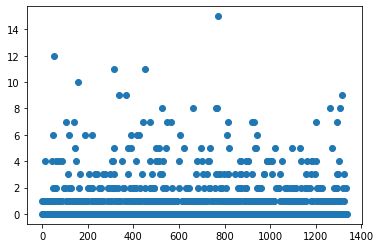

In [325]:
# difference between prediction and label
diff_XGB = abs(y_1_XGB-y_test_16)
np.savetxt('diff_XGB', diff_XGB, delimiter=',')
plt.plot(diff, 'o')

In [326]:
# direct accuracy
(len(diff_XGB) - np.count_nonzero(diff_XGB))/len(diff_XGB)

0.7859281437125748

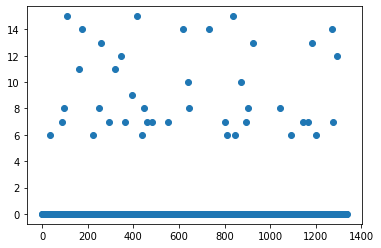

In [327]:
# <=5 then 0
round_diff_XGB = np.zeros(len(y_test_16))
for i in range(len(y_test_16)):
    if abs(y_1_XGB[i]-y_test_16[i])<=5:
        round_diff_XGB[i] = 0
    else:
        round_diff_XGB[i] = abs(y_1_XGB[i]-y_test_16[i])
# plt.subplot(122)
plt.plot(round_diff_XGB, 'o')

In [328]:
# +- 5 pixels are regarded as correctly-classified
1-np.count_nonzero(round_diff_XGB)/len(y_test_16)

0.969311377245509

## Formal Test x10

### ±5pixels

In [35]:
XGB_Acc = []

for i in range(100):
    X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split( X_6v, y, test_size=0.2)

    scaler=StandardScaler()
    X_train_16=scaler.fit_transform(X_train_16)
    X_test_16=scaler.transform(X_test_16)

    XGB = XGBRegressor(n_jobs=-1,n_estimators=350,learning_rate=0.1,max_depth=8,gamma=0.2,colsample_bytree=0.6,objective='reg:squarederror')

    XGB.fit(X_train_16,y_train_16)

    # predict
    y_pred_XGB = XGB.predict(X_test_16)
    print(i, ":")
    print("MSE: ",mean_squared_error(y_test_16, y_pred_XGB))
    print("MAE: ", mean_absolute_error(y_test_16, y_pred_XGB))

    # round
    y_1_XGB = np.around(y_pred_XGB)
    y_1_XGB = y_1_XGB.astype(int)

    # difference between prediction and label
    diff_XGB = abs(y_1_XGB-y_test_16)

    # <=5 then 0
    round_diff_XGB = np.zeros(len(y_test_16))
    for i in range(len(y_test_16)):
        if abs(y_1_XGB[i]-y_test_16[i])<=5:
            round_diff_XGB[i] = 0
        else:
            round_diff_XGB[i] = abs(y_1_XGB[i]-y_test_16[i])

    # +- 5 pixels are regarded as correctly-classified
    acc_XGB = 1-np.count_nonzero(round_diff_XGB)/len(y_test_16)
    print("acc: ", acc_XGB)
    # direct accuracy
    print("Direct accuracy: ",(len(diff_XGB) - np.count_nonzero(diff_XGB))/len(diff_XGB))
    print("\n")
    XGB_Acc.append(acc_XGB)

0 :
MSE:  4.275323637674735
MAE:  0.7939051622803697
acc:  0.9603293413173652
Direct accuracy:  0.7649700598802395


1 :
MSE:  3.5704219454371646
MAE:  0.6625167116924318
acc:  0.9723053892215568
Direct accuracy:  0.7754491017964071


2 :
MSE:  4.338800923595393
MAE:  0.7725406731450986
acc:  0.968562874251497
Direct accuracy:  0.7559880239520959


3 :
MSE:  4.402511939733385
MAE:  0.7508904387850961
acc:  0.9730538922155688
Direct accuracy:  0.7664670658682635


4 :
MSE:  3.947312489773974
MAE:  0.713660697759447
acc:  0.9730538922155688
Direct accuracy:  0.7747005988023952


5 :
MSE:  3.3471086658384155
MAE:  0.6790591241669155
acc:  0.9738023952095809
Direct accuracy:  0.7687125748502994


6 :
MSE:  3.357666765563333
MAE:  0.6387633253223525
acc:  0.9752994011976048
Direct accuracy:  0.7986526946107785


7 :
MSE:  3.9978386560263908
MAE:  0.7349168299111778
acc:  0.968562874251497
Direct accuracy:  0.7642215568862275


8 :
MSE:  4.324153267084808
MAE:  0.7377067981232069
acc:  0.969

70 :
MSE:  3.9765964625576564
MAE:  0.7359300828176344
acc:  0.968562874251497
Direct accuracy:  0.7574850299401198


71 :
MSE:  3.360584587897115
MAE:  0.6803445553262076
acc:  0.9715568862275449
Direct accuracy:  0.7881736526946108


72 :
MSE:  3.601505897390916
MAE:  0.681953100074908
acc:  0.9715568862275449
Direct accuracy:  0.7799401197604791


73 :
MSE:  4.868352456713696
MAE:  0.7642072109940523
acc:  0.9670658682634731
Direct accuracy:  0.7784431137724551


74 :
MSE:  4.370425721145578
MAE:  0.7408607979779115
acc:  0.9708083832335329
Direct accuracy:  0.7791916167664671


75 :
MSE:  3.588220890553542
MAE:  0.6798175316593961
acc:  0.9738023952095809
Direct accuracy:  0.7836826347305389


76 :
MSE:  4.8021510339212545
MAE:  0.7844503418191108
acc:  0.9618263473053892
Direct accuracy:  0.7747005988023952


77 :
MSE:  4.044971513422575
MAE:  0.7006519395344986
acc:  0.9738023952095809
Direct accuracy:  0.7896706586826348


78 :
MSE:  3.6573089385432382
MAE:  0.6770641773849905
a

In [36]:
print(np.mean(XGB_Acc))

0.9695359281437125


### ±3pixels

In [47]:
XGB_Acc = []

for i in range(100):
    X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split( X_6v, y, test_size=0.2)

    scaler=StandardScaler()
    X_train_16=scaler.fit_transform(X_train_16)
    X_test_16=scaler.transform(X_test_16)

    XGB = XGBRegressor(n_jobs=-1,n_estimators=350,learning_rate=0.1,max_depth=8,gamma=0.2,colsample_bytree=0.6,objective='reg:squarederror')

    XGB.fit(X_train_16,y_train_16)

    # predict
    y_pred_XGB = XGB.predict(X_test_16)
    print(i, ":")
    print("MSE: ",mean_squared_error(y_test_16, y_pred_XGB))
    print("MAE: ", mean_absolute_error(y_test_16, y_pred_XGB))

    # round
    y_1_XGB = np.around(y_pred_XGB)
    y_1_XGB = y_1_XGB.astype(int)

    # difference between prediction and label
    diff_XGB = abs(y_1_XGB-y_test_16)

    # <=3 then 0
    round_diff_XGB = np.zeros(len(y_test_16))
    for i in range(len(y_test_16)):
        if abs(y_1_XGB[i]-y_test_16[i])<=3:
            round_diff_XGB[i] = 0
        else:
            round_diff_XGB[i] = abs(y_1_XGB[i]-y_test_16[i])

    # +- 3 pixels are regarded as correctly-classified
    acc_XGB = 1-np.count_nonzero(round_diff_XGB)/len(y_test_16)
    print("acc: ", acc_XGB)
    # direct accuracy
    print("Direct accuracy: ",(len(diff_XGB) - np.count_nonzero(diff_XGB))/len(diff_XGB))
    print("\n")
    XGB_Acc.append(acc_XGB)

0 :
MSE:  3.596968083302414
MAE:  0.661938481322841
acc:  0.9491017964071856
Direct accuracy:  0.7769461077844312


1 :
MSE:  4.796442016449819
MAE:  0.7963961589033018
acc:  0.936377245508982
Direct accuracy:  0.7537425149700598


2 :
MSE:  4.192269889542058
MAE:  0.7018411767161535
acc:  0.9453592814371258
Direct accuracy:  0.7859281437125748


3 :
MSE:  3.571732345650219
MAE:  0.6728908124485773
acc:  0.9476047904191617
Direct accuracy:  0.781437125748503


4 :
MSE:  3.9755630379622753
MAE:  0.7188827517236064
acc:  0.937874251497006
Direct accuracy:  0.7829341317365269


5 :
MSE:  3.361743463765259
MAE:  0.6699398731489381
acc:  0.9461077844311377
Direct accuracy:  0.7851796407185628


6 :
MSE:  3.810950176375208
MAE:  0.6649120877647471
acc:  0.9543413173652695
Direct accuracy:  0.7851796407185628


7 :
MSE:  3.588542653017267
MAE:  0.6610694509334193
acc:  0.9513473053892215
Direct accuracy:  0.7971556886227545


8 :
MSE:  3.862304932358673
MAE:  0.6942203294954257
acc:  0.944610

70 :
MSE:  4.435489989311765
MAE:  0.7670726794861034
acc:  0.9333832335329342
Direct accuracy:  0.7709580838323353


71 :
MSE:  3.9869222765723227
MAE:  0.6872839991694796
acc:  0.9498502994011976
Direct accuracy:  0.782185628742515


72 :
MSE:  3.752848800164899
MAE:  0.6601914252617402
acc:  0.9505988023952096
Direct accuracy:  0.8053892215568862


73 :
MSE:  4.155923212245406
MAE:  0.7573855212348664
acc:  0.9356287425149701
Direct accuracy:  0.7642215568862275


74 :
MSE:  3.9514141054003966
MAE:  0.7356585993649003
acc:  0.9416167664670658
Direct accuracy:  0.7604790419161677


75 :
MSE:  4.196699263156397
MAE:  0.7266277211556534
acc:  0.9416167664670658
Direct accuracy:  0.7904191616766467


76 :
MSE:  3.739518616289651
MAE:  0.689335030531455
acc:  0.9468562874251497
Direct accuracy:  0.7761976047904192


77 :
MSE:  5.025672957651618
MAE:  0.7790948619653365
acc:  0.9453592814371258
Direct accuracy:  0.7761976047904192


78 :
MSE:  4.956346108538337
MAE:  0.8157040248820168
ac

In [49]:
print(np.mean(XGB_Acc))

0.9452769461077846


# LightGBMRegressor

In [14]:
ave_score_LGB_MSE_final = []
ave_score_LGB_MAE_final = []


for i in range(10):

  X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split( X_6v, y, test_size=0.2)

  scaler=StandardScaler()
  X_train_16=scaler.fit_transform(X_train_16)
  X_test_16=scaler.transform(X_test_16)

  LGB = LGBMRegressor(n_jobs=-1,colsample_bytree=0.6)

  param_grid = {
          "n_estimators": [250,300,350],
          "learning_rate": [0.01, 0.03, 0.10],
          "num_leaves": [16,24,32,40,48],
          "max_depth": [8,16,20,24,32],
          "min_child_samples": [8,16,20,24,32]
          }
  LGB_grid = RandomizedSearchCV(LGB, param_grid, cv=5)
  LGB_grid.fit(X_train_16,y_train_16)
  best_est_LGB = LGB_grid.best_estimator_ 

  best_est_LGB.fit(X_train_16,y_train_16)

  y_pred = best_est_LGB.predict(X_test_16)
  print('Round {}'.format(i+1))
  print('Best parameters:', LGB_grid.best_params_)
  print('MSE: {:.4f}'.format(mean_squared_error(y_test_16, y_pred)))
  print('MAE: {:.4f}'.format(mean_absolute_error(y_test_16, y_pred)))

  print('----------------------------------------------------------------------------------------------------------------------')

  ave_score_LGB_MSE_final.append(mean_squared_error(y_test_16, y_pred))
  ave_score_LGB_MAE_final.append(mean_absolute_error(y_test_16, y_pred))

Round 1
Best parameters: {'num_leaves': 32, 'n_estimators': 350, 'min_child_samples': 8, 'max_depth': 20, 'learning_rate': 0.1}
MSE: 4.1805
MAE: 0.7490
----------------------------------------------------------------------------------------------------------------------
Round 2
Best parameters: {'num_leaves': 48, 'n_estimators': 350, 'min_child_samples': 32, 'max_depth': 20, 'learning_rate': 0.1}
MSE: 3.9863
MAE: 0.7708
----------------------------------------------------------------------------------------------------------------------
Round 3
Best parameters: {'num_leaves': 48, 'n_estimators': 300, 'min_child_samples': 8, 'max_depth': 20, 'learning_rate': 0.1}
MSE: 4.2792
MAE: 0.7192
----------------------------------------------------------------------------------------------------------------------
Round 4
Best parameters: {'num_leaves': 32, 'n_estimators': 350, 'min_child_samples': 8, 'max_depth': 8, 'learning_rate': 0.03}
MSE: 4.1312
MAE: 0.9675
----------------------------------

In [16]:
print("average MSE: {}".format(np.mean(ave_score_LGB_MSE_final)))
print("average MAE: {}".format(np.mean(ave_score_LGB_MAE_final)))

average MSE: 4.007201722622896
average MAE: 0.8334229056294271


### num_leaves=32
### n_estimators=350
### learning_rate=0.1
### min_child_samples=8
### max_depth=20
### colsample_bytree=0.6

In [287]:
MSE = []
MAE = []
for i in range(10):
    X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split( X_6v, y, test_size=0.2)

    scaler=StandardScaler()
    X_train_16=scaler.fit_transform(X_train_16)
    X_test_16=scaler.transform(X_test_16)

    LGB = LGBMRegressor(n_jobs=-1,num_leaves=32,n_estimators=350,learning_rate=0.1,min_child_samples=8,max_depth=20,colsample_bytree=0.6)

    LGB.fit(X_train_16,y_train_16)
    
    y_pred = LGB.predict(X_test_16)
    
    MSE.append(mean_squared_error(y_test_16, y_pred))
    MAE.append(mean_absolute_error(y_test_16, y_pred))

print("MSE: ", np.mean(MSE))
print("MAE: ", np.mean(MAE))

MSE:  3.722438766705641
MAE:  0.7163124487401377


In [355]:
import math
print("RMSE: ", math.sqrt(np.mean(MSE)))

RMSE:  1.9293622694314412


## Formal test

In [65]:
X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split( X_6v, y, test_size=0.2)

scaler=StandardScaler()
X_train_16=scaler.fit_transform(X_train_16)
X_test_16=scaler.transform(X_test_16)

# max_depth=20
LGB = LGBMRegressor(n_jobs=-1,num_leaves=32,n_estimators=350,learning_rate=0.1,min_child_samples=8,max_depth=16,colsample_bytree=0.6)

LGB.fit(X_train_16,y_train_16)
    

LGBMRegressor(colsample_bytree=0.6, max_depth=16, min_child_samples=8,
              n_estimators=350, num_leaves=32)

In [66]:
print(X_train_16.shape)
print(y_train_16.shape)
print(X_test_16.shape)
print(y_test_16.shape)

(5344, 96)
(5344,)
(1336, 96)
(1336,)


In [67]:
# predict
y_pred_LGB = LGB.predict(X_test_16)
np.savetxt('y_pred_LGB', y_pred_LGB, delimiter=',')

In [68]:
print("MSE: ",mean_squared_error(y_test_16, y_pred_LGB))
print("MAE: ", mean_absolute_error(y_test_16, y_pred_LGB))

MSE:  3.414431437935909
MAE:  0.6685860538471078


In [69]:
# round
y_1_LGB = np.around(y_pred_LGB)
y_1_LGB = y_1_LGB.astype(int)
np.savetxt('y_1_LGB', y_1_LGB, delimiter=',')

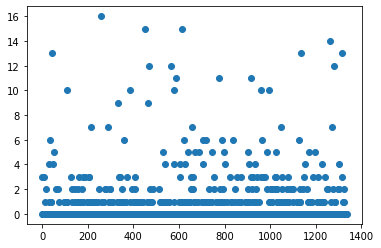

In [70]:
# difference between prediction and label
diff_LGB = abs(y_1_LGB-y_test_16)
np.savetxt('diff_LGB', diff_LGB, delimiter=',')
plt.plot(diff_LGB, 'o')

In [71]:
# direct accuracy
(len(diff_LGB) - np.count_nonzero(diff_LGB))/len(diff_LGB)

0.7732035928143712

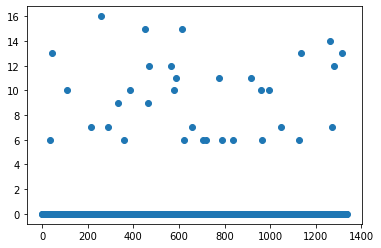

In [72]:
# <=5 then 0
round_diff_LGB = np.zeros(len(y_test_16))
for i in range(len(y_test_16)):
    if abs(y_1_LGB[i]-y_test_16[i])<=5:
        round_diff_LGB[i] = 0
    else:
        round_diff_LGB[i] = abs(y_1_LGB[i]-y_test_16[i])
# plt.subplot(122)
plt.plot(round_diff_LGB, 'o')

In [73]:
# +- 5 pixels are regarded as correctly-classified
1-np.count_nonzero(round_diff_LGB)/len(y_test_16)

0.9745508982035929

## predict those samples with inner wave

In [332]:
X_IW = []
y_IW = []
MSE_IW = []
MAE_IW = []

for i in range(len(y)):
    if y[i]!=0:
        X_IW.append(X_6v[i])
        y_IW.append(y[i])
print(len(X_IW), len(y_IW))

for i in range(10):
    X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split( X_IW, y_IW, test_size=0.2)

    scaler=StandardScaler()
    X_train_16=scaler.fit_transform(X_train_16)
    X_test_16=scaler.transform(X_test_16)

    LGB = LGBMRegressor(n_jobs=-1,num_leaves=32,n_estimators=350,learning_rate=0.1,min_child_samples=8,max_depth=20,colsample_bytree=0.6)

    LGB.fit(X_train_16,y_train_16)
    
    y_pred_IW = LGB.predict(X_test_16)
    MSE_IW.append(mean_squared_error(y_test_16, y_pred_IW))
    MAE_IW.append(mean_absolute_error(y_test_16, y_pred_IW))

print("MSE: ", np.mean(MSE_IW))
print("MAE: ", np.mean(MAE_IW))
    

1476 1476
MSE:  0.9737147595785007
MAE:  0.4529205128821133


In [357]:
math.sqrt(np.mean(MSE_IW))

0.9867698615069781

## Formal Test x10

### ±5pixels error

In [33]:
LGB_Acc = []

for i in range(### ±3pixels error100):
    X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split( X_6v, y, test_size=0.2)

    scaler=StandardScaler()
    X_train_16=scaler.fit_transform(X_train_16)
    X_test_16=scaler.transform(X_test_16)

    # max_depth=20
    LGB = LGBMRegressor(n_jobs=-1,num_leaves=32,n_estimators=350,learning_rate=0.1,min_child_samples=8,max_depth=16,colsample_bytree=0.6)

    LGB.fit(X_train_16,y_train_16)

    # predict
    y_pred_LGB = LGB.predict(X_test_16)
    print(i, ":")
    print("MSE: ",mean_squared_error(y_test_16, y_pred_LGB))
    print("MAE: ", mean_absolute_error(y_test_16, y_pred_LGB))

    # round
    y_1_LGB = np.around(y_pred_LGB)
    y_1_LGB = y_1_LGB.astype(int)

    # difference between prediction and label
    diff_LGB = abs(y_1_LGB-y_test_16)

    # <=5 then 0
    round_diff_LGB = np.zeros(len(y_test_16))
    for i in range(len(y_test_16)):
        if abs(y_1_LGB[i]-y_test_16[i])<=5:
            round_diff_LGB[i] = 0
        else:
            round_diff_LGB[i] = abs(y_1_LGB[i]-y_test_16[i])

    # +- 5 pixels are regarded as correctly-classified
    acc_LGB = 1-np.count_nonzero(round_diff_LGB)/len(y_test_16)
    print("acc: ", acc_LGB)
    # direct accuracy
    print("Direct accuracy: ",(len(diff_LGB) - np.count_nonzero(diff_LGB))/len(diff_LGB))
    print("\n")
    LGB_Acc.append(acc_LGB)

0 :
MSE:  3.5945400322219903
MAE:  0.6673846843725741
acc:  0.9745508982035929
Direct accuracy:  0.7866766467065869


1 :
MSE:  4.039763778146911
MAE:  0.7083323366021179
acc:  0.9715568862275449
Direct accuracy:  0.7627245508982036


2 :
MSE:  3.220737631883959
MAE:  0.6453163258407577
acc:  0.9730538922155688
Direct accuracy:  0.7784431137724551


3 :
MSE:  3.170406364149271
MAE:  0.6574961927386035
acc:  0.9738023952095809
Direct accuracy:  0.7679640718562875


4 :
MSE:  4.142300702296581
MAE:  0.7557617372829959
acc:  0.9738023952095809
Direct accuracy:  0.7447604790419161


5 :
MSE:  3.9611573484618594
MAE:  0.7799488642185298
acc:  0.967814371257485
Direct accuracy:  0.7447604790419161


6 :
MSE:  3.2176917580363753
MAE:  0.68065893934182
acc:  0.9708083832335329
Direct accuracy:  0.7747005988023952


7 :
MSE:  3.561035272465593
MAE:  0.6980499942392075
acc:  0.967814371257485
Direct accuracy:  0.7672155688622755


8 :
MSE:  4.699130343880163
MAE:  0.7817253845349439
acc:  0.9610

70 :
MSE:  3.60938376750353
MAE:  0.7198572797384122
acc:  0.9708083832335329
Direct accuracy:  0.7642215568862275


71 :
MSE:  3.742468720085315
MAE:  0.7146965540840585
acc:  0.9715568862275449
Direct accuracy:  0.7672155688622755


72 :
MSE:  3.689508945795956
MAE:  0.6835539920911909
acc:  0.9730538922155688
Direct accuracy:  0.7619760479041916


73 :
MSE:  3.707697814030026
MAE:  0.7169299151848398
acc:  0.9700598802395209
Direct accuracy:  0.7589820359281437


74 :
MSE:  4.063824817262301
MAE:  0.7052231806920264
acc:  0.9723053892215568
Direct accuracy:  0.7612275449101796


75 :
MSE:  3.4985315523414546
MAE:  0.679239771728783
acc:  0.968562874251497
Direct accuracy:  0.780688622754491


76 :
MSE:  2.7823860087844356
MAE:  0.6240750102204387
acc:  0.9797904191616766
Direct accuracy:  0.7672155688622755


77 :
MSE:  3.1450807027735452
MAE:  0.6354795338644833
acc:  0.9775449101796407
Direct accuracy:  0.7747005988023952


78 :
MSE:  3.754728446586306
MAE:  0.7074469100610133
acc

In [40]:
print(np.mean(LGB_Acc))

0.9714895209580839


### ±3pixels error

In [41]:
LGB_Acc_3 = []

for i in range(100):
    X_train_16, X_test_16, y_train_16, y_test_16 = train_test_split( X_6v, y, test_size=0.2)

    scaler=StandardScaler()
    X_train_16=scaler.fit_transform(X_train_16)
    X_test_16=scaler.transform(X_test_16)

    # max_depth=20
    LGB = LGBMRegressor(n_jobs=-1,num_leaves=32,n_estimators=350,learning_rate=0.1,min_child_samples=8,max_depth=16,colsample_bytree=0.6)

    LGB.fit(X_train_16,y_train_16)

    # predict
    y_pred_LGB = LGB.predict(X_test_16)
    print(i, ":")
    print("MSE: ",mean_squared_error(y_test_16, y_pred_LGB))
    print("MAE: ", mean_absolute_error(y_test_16, y_pred_LGB))

    # round
    y_1_LGB = np.around(y_pred_LGB)
    y_1_LGB = y_1_LGB.astype(int)

    # difference between prediction and label
    diff_LGB = abs(y_1_LGB-y_test_16)

    # <=3 then 0
    round_diff_LGB = np.zeros(len(y_test_16))
    for i in range(len(y_test_16)):
        if abs(y_1_LGB[i]-y_test_16[i])<=3:
            round_diff_LGB[i] = 0
        else:
            round_diff_LGB[i] = abs(y_1_LGB[i]-y_test_16[i])

    # +- 3 pixels are regarded as correctly-classified
    acc_LGB_3 = 1-np.count_nonzero(round_diff_LGB)/len(y_test_16)
    print("acc: ", acc_LGB_3)
    # direct accuracy
    print("Direct accuracy: ",(len(diff_LGB) - np.count_nonzero(diff_LGB))/len(diff_LGB))
    print("\n")
    LGB_Acc_3.append(acc_LGB_3)

0 :
MSE:  3.7728516779701473
MAE:  0.7238912219831459
acc:  0.9476047904191617
Direct accuracy:  0.7552395209580839


1 :
MSE:  3.650879860633836
MAE:  0.7099415749785993
acc:  0.9476047904191617
Direct accuracy:  0.7649700598802395


2 :
MSE:  3.3291429966412434
MAE:  0.6591073732817045
acc:  0.9520958083832335
Direct accuracy:  0.7649700598802395


3 :
MSE:  2.9902154474929956
MAE:  0.6676114845989825
acc:  0.9491017964071856
Direct accuracy:  0.7597305389221557


4 :
MSE:  3.7988532121106076
MAE:  0.6787681559439205
acc:  0.9505988023952096
Direct accuracy:  0.7799401197604791


5 :
MSE:  3.3828002906642625
MAE:  0.6846804460442498
acc:  0.9528443113772456
Direct accuracy:  0.7642215568862275


6 :
MSE:  4.090474370554802
MAE:  0.7889648694899744
acc:  0.9438622754491018
Direct accuracy:  0.7417664670658682


7 :
MSE:  4.048623591731736
MAE:  0.7272163538787905
acc:  0.9461077844311377
Direct accuracy:  0.7664670658682635


8 :
MSE:  2.9039514539736464
MAE:  0.6302519386278794
acc: 

70 :
MSE:  3.6535198315248194
MAE:  0.7291836127174093
acc:  0.9498502994011976
Direct accuracy:  0.7395209580838323


71 :
MSE:  3.982627384707925
MAE:  0.7472847210216851
acc:  0.9461077844311377
Direct accuracy:  0.7470059880239521


72 :
MSE:  3.634357956271198
MAE:  0.74992328728253
acc:  0.9438622754491018
Direct accuracy:  0.7529940119760479


73 :
MSE:  4.001010698332032
MAE:  0.7565671722704553
acc:  0.9483532934131736
Direct accuracy:  0.749251497005988


74 :
MSE:  4.318782643049067
MAE:  0.7913797826632321
acc:  0.9333832335329342
Direct accuracy:  0.7537425149700598


75 :
MSE:  3.249878434803532
MAE:  0.6619226114714782
acc:  0.9573353293413174
Direct accuracy:  0.782185628742515


76 :
MSE:  3.8102264870564952
MAE:  0.7515171673356307
acc:  0.9393712574850299
Direct accuracy:  0.7567365269461078


77 :
MSE:  3.4063024705378804
MAE:  0.6721233532744701
acc:  0.9476047904191617
Direct accuracy:  0.780688622754491


78 :
MSE:  3.4171883068936966
MAE:  0.6939613840598592
acc

In [44]:
print(np.mean(LGB_Acc_3))

0.9467814371257484


# NNRegressor - TODO

## Conv - 2D

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential,activations
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D,Conv2D,MaxPooling1D,MaxPooling2D,GlobalMaxPooling2D,AveragePooling2D,Activation,Input,Add,Dense,ZeroPadding2D,Flatten
from tensorflow.keras.optimizers import Adam
from keras.initializers import glorot_uniform
from keras.models import Model
from keras import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

In [ ]:
# ====================TODO=====================

data_2D = np.load("/content/drive/My Drive/Colab Notebooks/patch/data_2D.npz")

X_2D = data_2D["arr_0"]
y_2D = data_2D["arr_1"]

X_2D[np.isnan(X_2D)]=0
y_2D[np.isnan(y_2D)]=0

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_2D, y_2D, test_size=0.2, random_state=42, shuffle=True)

# X_train_3 = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test_3 = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train_3.shape)
print(X_test_3.shape)


In [ ]:
# ====================TODO=====================

model_3=Sequential()
model_3.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=X_train_3[0].shape,kernel_regularizer='l2',kernel_initializer="he_uniform",padding="same"))
model_3.add(BatchNormalization())
# model_3.add(MaxPooling2D())

model_3.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',kernel_regularizer='l2',kernel_initializer="he_uniform",padding="same"))
model_3.add(BatchNormalization())
# model_3.add(MaxPooling2D())

model_3.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_regularizer='l2',kernel_initializer="he_uniform",padding="same"))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D())

model_3.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',kernel_regularizer='l2',kernel_initializer="he_uniform",padding="same"))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D())

model_3.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',kernel_regularizer='l2',kernel_initializer="he_uniform",padding="same"))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D())

model_3.add(Flatten())
model_3.add(Dense(64,activation='relu',kernel_regularizer='l2',kernel_initializer="he_uniform"))
model_3.add(Dropout(0.2))
model_3.add(Dense(32,activation='relu',kernel_regularizer='l2',kernel_initializer="he_uniform"))
model_3.add(Dropout(0.2))
model_3.add(Dense(16,activation='relu',kernel_regularizer='l2',kernel_initializer="he_uniform"))
# model.add(Dropout(0.1))
model_3.add(Dense(1,activation='sigmoid'))


model_3.summary()

## ResNet 50

## VGG 16

# Data Augmentation

## NN Conv2D